In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

%matplotlib inline

In [3]:
ds = xr.open_dataset('gebco_2019_n-36.0_s-46.0_w25.0_e70.0.nc')
ds

<xarray.Dataset>
Dimensions:    (lat: 2400, lon: 10800)
Coordinates:
  * lat        (lat) float64 -46.0 -45.99 -45.99 -45.99 ... -36.01 -36.01 -36.0
  * lon        (lon) float64 25.0 25.01 25.01 25.01 ... 69.99 69.99 69.99 70.0
Data variables:
    elevation  (lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2019 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The GEBCO_2019 Grid is the latest global bathymetric produc...
    history:      Information on the development of the data set and the sour...
    references:   DOI: 10.5285/836f016a-33be-6ddc-e053-6c86abc0788e
    comment:      The data in the GEBCO_2019 Grid should not be used for navi...
    node_offset:  1.0

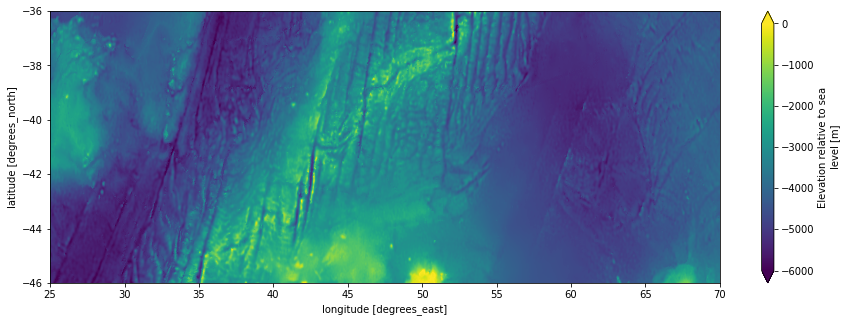

In [4]:
plt.figure(figsize=(15, 5))
ds.elevation.plot(vmin=-6000, vmax =0)

In [9]:
# calculate f for the whole grid
omega = 7.2921159e-05  # angular velocity of the Earth [rad/s]
f = 2*omega*np.sin(ds.lat/360.*2*np.pi)
f

<xarray.DataArray 'lat' (lat: 2400)>
array([-1.049065e-04, -1.048991e-04, -1.048918e-04, ..., -8.574541e-05,
       -8.573683e-05, -8.572825e-05])
Coordinates:
  * lat      (lat) float64 -46.0 -45.99 -45.99 -45.99 ... -36.01 -36.01 -36.0

In [32]:
ds.elevation[1]

<xarray.DataArray 'elevation' (lon: 10800)>
array([-5407.3984, -5402.477 , -5397.496 , ..., -3249.2651, -3247.489 ,
       -3245.6917], dtype=float32)
Coordinates:
    lat      float64 -45.99
  * lon      (lon) float64 25.0 25.01 25.01 25.01 ... 69.99 69.99 69.99 70.0
Attributes:
    standard_name:       height_above_reference_ellipsoid
    long_name:           Elevation relative to sea level
    units:               m
    sdn_parameter_urn:   SDN:P01::ALATZZ01
    sdn_parameter_name:  Sea floor height (above mean sea level) {bathymetric...
    sdn_uom_urn:         SDN:P06::ULAA
    sdn_uom_name:        Metres

In [29]:
#multiply this by water depth to get f/H
test = f/ds.elevation

<xarray.DataArray ()>
array(0.000112)

Text(0.5, 1.0, 'f/H [s$^{-1}$ m$^{-1}$]')

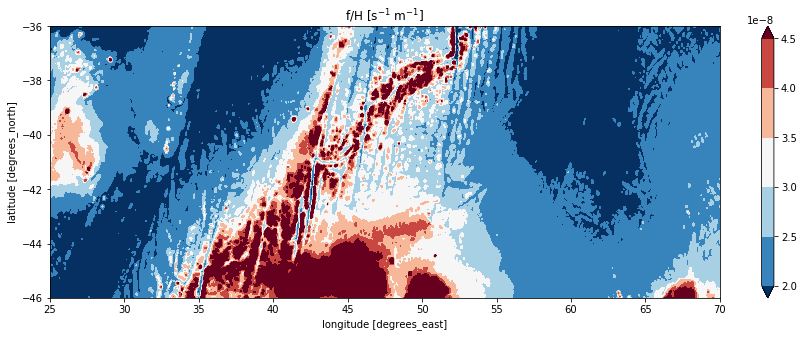

In [46]:
levels=np.arange(0.00000002,0.00000005,0.000000005)
test.plot.contourf(levels=levels)

#plot on a nice map
plt.figure(figsize=(15, 5))
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                            facecolor='none', name='coastline')

ax1 = plt.axes(projection=ccrs.PlateCarree())
feature = ax1.add_feature(coast, edgecolor='black',facecolor='gray')
test.plot.contourf(levels=levelstransform=ccrs.PlateCarree())
#plt.plot(start_lon, start_lat, color='red', marker='^',markersize = 10,transform=ccrs.PlateCarree())

ax1.set_extent([24.125, 71, -36, -46])
gl = ax1.gridlines(draw_labels=True,
             color='black', alpha=0.2, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.ylabels_right = False
gl.xlabels_top = False
plt.title('f/H [s$^{-1}$ m$^{-1}$]')